In [21]:
import gzip
import sys
from pympler import asizeof
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

text = "Your text data here"
text_en = text.encode('utf-8')
print( f"size of text: [{text}] : is {sys.getsizeof(text)} bytes" )
print( f"size of encoded text : [{text_en}] : is {sys.getsizeof( text_en )} bytes" )

text_com = gzip.compress(text.encode('utf-8'))
text_en_com = gzip.compress(text_en)
print( sys.getsizeof( text_com))
print(text_com)

print(f"de-compress: {gzip.decompress(text_com).decode()}")

size of text: [Your text data here] : is 68 bytes
size of encoded text : [b'Your text data here'] : is 52 bytes
72
b'\x1f\x8b\x08\x00\xc1\xeard\x02\xff\x8b\xcc/-R(I\xad(QHI,IT\xc8H-J\x05\x00\xc1\xca\x8c_\x13\x00\x00\x00'
de-compress: Your text data here


In [54]:
file_path = "data.json"
def write_dict_file(data):
    d = load_data_file()
    if d:
        d.extends(data)
        # Open the file in wrte mode
        with open(file_path , "w") as file:
            # Write the dictionary as a JSON string to the file
            json.dump(d, file)
        return True
    else: return False

def load_data_file():
    '''load current data and append new data'''
    data = None
    with open(file_path, "r") as file:
        data = json.load(file)
    return data

In [93]:
from serpapi import GoogleSearch

class Authors(object):
  def __init__(self) -> None:
    '''constructor for the class.'''

  def search_scholar(self, ):
    '''search author from google scholar...'''
    search = GoogleSearch({
        "engine": "google_scholar",
        "q": "nlp",
        "author": "Mercy Mpinganjira",
        "location": "south africa",
        "api_key": "623e7e74cde13a07079ea444adbbb7b0fd7070796b34b061e21fc1be638c7c9b"
      })
    result = search.get_dict()
    return result['organic_results']

  def search_author(self, author_id: str ):
    '''search result by author'''
    search = GoogleSearch({
      "engine": "google_scholar_author",
      "author_id": author_id,
      "api_key": "623e7e74cde13a07079ea444adbbb7b0fd7070796b34b061e21fc1be638c7c9b"
    })
    result = search.get_dict()
    return result

  def get_author_profile(self, names: str):
    params = {
      "engine": "google_scholar_profiles",
      "mauthors": names,
      "api_key": "623e7e74cde13a07079ea444adbbb7b0fd7070796b34b061e21fc1be638c7c9b"
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    profiles = results["profiles"]
    return profiles

In [94]:
# 
a_name = "Mercy Mpinganjira"
a_obj = Authors()
# a_obj.



# r = search_author()
# print(f"{r.keys()}")
# r['co_authors']

[{'name': 'Mercy Mpinganjira', 'link': 'https://scholar.google.com/citations?hl=en&user=ry6x3GUAAAAJ', 'serpapi_link': 'https://serpapi.com/search.json?author_id=ry6x3GUAAAAJ&engine=google_scholar_author&hl=en', 'author_id': 'ry6x3GUAAAAJ', 'affiliations': 'Professor, University of Johannesburg', 'email': 'Verified email at uj.ac.za', 'cited_by': 2188, 'interests': [{'title': 'Digital Marketing and Consumer Behaviour', 'serpapi_link': 'https://serpapi.com/search.json?engine=google_scholar_profiles&hl=en&mauthors=label%3Adigital_marketing_and_consumer_behaviour', 'link': 'https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=label:digital_marketing_and_consumer_behaviour'}], 'thumbnail': 'https://scholar.googleusercontent.com/citations?view_op=small_photo&user=ry6x3GUAAAAJ&citpid=1'}]


In [ ]:
# write to file
# print(result['organic_results'])
available_data = load_data_file()
# print(available_data)
if available_data:
    write_dict_file( result['organic_results'].extend(available_data) )
else:
    write_dict_file( result['organic_results'] )
# write_dict_file( result['organic_results'] )

In [57]:
print(result.keys())
len( result['organic_results'] )

dict_keys(['search_metadata', 'search_parameters', 'search_information', 'organic_results', 'related_searches', 'pagination', 'serpapi_pagination'])


20

In [53]:
# data visualisation
with open("./articles.json") as obj:
    data = json.load(obj)
data[0]

{'title': 'Modeling code-switching speech on under-resourced languages for language identification',
 'link': 'https://scholar.google.com/citations?view_op=view_citation&hl=en&user=0L3EvQYAAAAJ&citation_for_view=0L3EvQYAAAAJ:UeHWp8X0CEIC',
 'citation_id': '0L3EvQYAAAAJ:UeHWp8X0CEIC',
 'authors': 'KR Mabokela, MJ Manamela, M Manaileng',
 'publication': 'Spoken Language Technologies for Under-Resourced Languages, 2014',
 'cited_by': {'value': 26,
  'link': 'https://scholar.google.com/scholar?oi=bibs&hl=en&cites=18191802244881488859',
  'serpapi_link': 'https://serpapi.com/search.json?cites=18191802244881488859&engine=google_scholar&hl=en',
  'cites_id': '18191802244881488859'},
 'year': '2014'}

In [56]:
i_features = [{"title":d['title'], "year":d['year'], 'cited':d['cited_by']['value']} for d in data]

ds = pd.DataFrame( i_features )
# replace NaN with zero.
ds.fillna(0, inplace=True)
ds['title'] = ds['title'].apply( lambda x : x.lower() )
ds.head()

,title,year,cited
0,modeling code-switching speech on under-resour...,2014,26.0
1,an integrated language identification for code...,2013,8.0
2,a multilingual asr of sepedi-english code-swit...,2019,3.0
3,a sentiment corpus for south african under-res...,2022,2.0
4,phone clustering methods for multilingual lang...,2020,2.0


In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=ds, x="year", y="cited", order=sorted(ds['year'].unique()) )
plt.title("Number Of Citations Per Year")
plt.xlabel("Year Of Publication")
plt.ylabel("Number Of Citations")
plt.show()

## solve clustering using keys words.

In [78]:
# key words
_keys_word = {
    'mobile tech': [
        'mobile', 'smartphone', 'cellphone', 'tablet', 'iOS', 'Android', 'iPhone', 'iPad', 'Samsung', 'Huawei',
        'Google Pixel', 'LG', 'Motorola', 'Nokia', 'Bluetooth', 'Wi-Fi', '5G', 'LTE'
    ],
    'data science': [
        'Data Analysis', 'Data Visualization', 'Data Wrangling', 'Data Engineering', 'Data Integration',
        'Data Exploration', 'Data Modeling', 'Data Mining', 'Data Warehousing', 'Machine Learning',
        'Statistical Analysis', 'Predictive Analytics', 'Text Mining', 'Time Series Analysis',
        'Feature Engineering', 'Dimensionality Reduction', 'Anomaly Detection', 'Clustering', 'Classification',
        'Regression', 'Natural Language Processing', 'Computer Vision', 'Big Data', 'Hadoop', 'Spark',
        'Python', 'R', 'SQL'
    ],
    'cybersecurity': [
        'Network Security', 'Web Security', 'Information Security', 'Cyber Threats', 'Data Privacy',
        'Cryptography', 'Vulnerability Assessment', 'Penetration Testing', 'Identity and Access Management',
        'Security Auditing', 'Security Policies', 'Malware Analysis', 'Intrusion Detection', 'Firewalls',
        'Secure Coding', 'Security Incident Response', 'Risk Assessment', 'Security Architecture', 'Ethical Hacking',
        'Cloud Security', 'IoT Security', 'Cyber Defense', 'SIEM', 'Zero Trust'
    ],
    'artificial intelligence software': [
        'Artificial Neural Networks', 'Expert Systems', 'Knowledge Representation', 'Natural Language Processing',
        'Computer Vision', 'Robotics', 'Machine Learning', 'Deep Learning', 'Reinforcement Learning',
        'Cognitive Computing', 'Genetic Algorithms', 'Swarm Intelligence', 'Fuzzy Logic', 'Speech Recognition',
        'Image Recognition', 'Pattern Recognition', 'AI Ethics', 'AI Governance', 'AI Bias', 'AI Explainability',
        'AI Applications', 'AI in Healthcare', 'AI in Finance', 'AI in Education', 'AI in Gaming', 'Machine Learning', 'Deep Learning', 'Neural Networks', 'Natural Language Processing', 'Computer Vision', 'Robotics', 'Data Mining', 'Predictive Analytics', 'Reinforcement Learning', 'Expert Systems', 'Cognitive Computing', 'Big Data', 'Pattern Recognition', 'Intelligent Agents', 'Speech Recognition',  'Image Recognition', 'Knowledge Representation', 'Decision Support Systems', 'Virtual Assistants', 'Autonomous Vehicles', 'NLP', 'CNN', 'RNN', 'TensorFlow', 'LLM', 'GPT', 'ChatGPT', 'Modeling', 'Speech', 'CSV', 'SVM', 'KNN'
    ],
    'health': [
        'Public Health', 'Epidemiology', 'Healthcare Systems', 'Medical Research', 'Health Informatics',
        'Health Data Analytics', 'Health Technology', 'Health Policy', 'Disease Prevention', 'Health Promotion',
        'Health Disparities', 'Health Behavior', 'Global Health', 'Digital Health', 'Telemedicine',
        'Health Monitoring', 'Health Interventions', 'Genomics', 'Precision Medicine', 'Medical Imaging',
        'Electronic Health Records', 'Patient Engagement', 'Healthcare Delivery'
    ],
    'social sciences': [
        'Sociology', 'Psychology', 'Anthropology', 'Political Science', 'Economics', 'Social Research',
        'Qualitative Research', 'Quantitative Research', 'Survey Methods', 'Data Analysis', 'Social Networks',
        'Cultural Studies', 'Gender Studies', 'Race and Ethnicity', 'Social Inequality', 'Social Policy',
        'Social Justice', 'Human Behavior', 'Qualitative Interviews', 'Focus Groups', 'Case Studies',
        'Demography', 'Social Theory', 'Social Impact', 'Community Development'
    ],
    'environment': [
        'Environmental Science', 'Climate Change', 'Sustainability', 'Conservation', 'Natural Resources',
        'Ecology', 'Environmental Policy', 'Renewable Energy', 'Environmental Impact Assessment', 'Green Technology',
        'Biodiversity', 'Ecosystems', 'Water Management', 'Air Pollution', 'Waste Management', 'Environmental Ethics',
        'Environmental Education', 'Climate Adaptation', 'Environmental Justice', 'Sustainable Development',
        'Environmental Modeling', 'Environmental Health', 'Environmental Economics', 'Land Use Planning'
    ],
    'politics': [
        'Political Science', 'Political Theory', 'International Relations', 'Comparative Politics', 'Governance',
        'Political Institutions', 'Public Policy', 'Political Economy', 'Political Behavior', 'Political Parties',
        'Democracy', 'Political Ideologies', 'Political Campaigns', 'Voting Behavior', 'Policy Analysis',
        'Policy Implementation', 'Political Activism', 'Political Communication', 'Political Leadership',
        'Political Reform', 'Global Governance', 'Power and Influence', 'Statecraft', 'Foreign Policy',
        'Political Sociology'
    ]
}
# 
# _keys_word

In [86]:
# 
_result: list = list()
# 
for article in data:
    f_key: str = ""; f_score: int = 0
    for k, cats in _keys_word.items():
        key, score = k, 0
        cats = ' '.join(cats).lower().split(' ')
        score = len(list(set( article['title'].lower().replace('-', ' ').strip().split(' ')).intersection(cats)) )
        
        if 'publication' in article.keys():
            score += len(list(set( article['publication'].lower().replace('-', ' ').strip().split(' ')).intersection(cats)) )
        if score > f_score: f_key = k; f_score = score
    # 
    _result.append({"title":article['title'], "year":article['year'], 'cited':article['cited_by']['value'], "keyword": f_key, "score": f_score})
ddd : pd.DataFrame = pd.DataFrame(_result)
ddd.fillna(0, inplace=True)
ddd['title'] = ddd['title'].apply( lambda x : x.lower() )





ddd['keyword'].unique()


array(['artificial intelligence software', 'data science',
       'cybersecurity', 'social sciences', 'environment', 'health', '',
       'politics'], dtype=object)

In [100]:
ddd.head()

,title,year,cited,keyword,score
0,modeling code-switching speech on under-resour...,2014,26.0,artificial intelligence software,4
1,an integrated language identification for code...,2013,8.0,artificial intelligence software,6
2,a multilingual asr of sepedi-english code-swit...,2019,3.0,data science,2
3,a sentiment corpus for south african under-res...,2022,2.0,artificial intelligence software,1
4,phone clustering methods for multilingual lang...,2020,2.0,data science,5


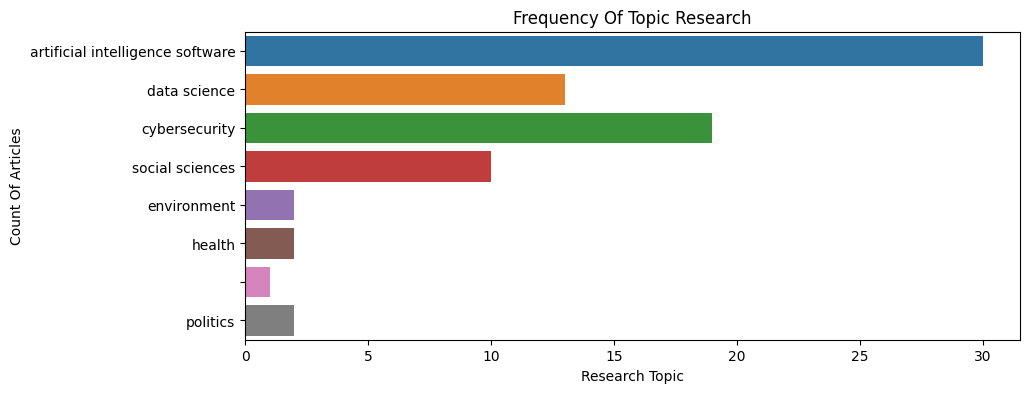

In [101]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data=ddd, y="keyword" )
plt.title("Frequency Of Topic Research")
plt.xlabel("Research Topic")
plt.ylabel("Count Of Articles")
plt.show()

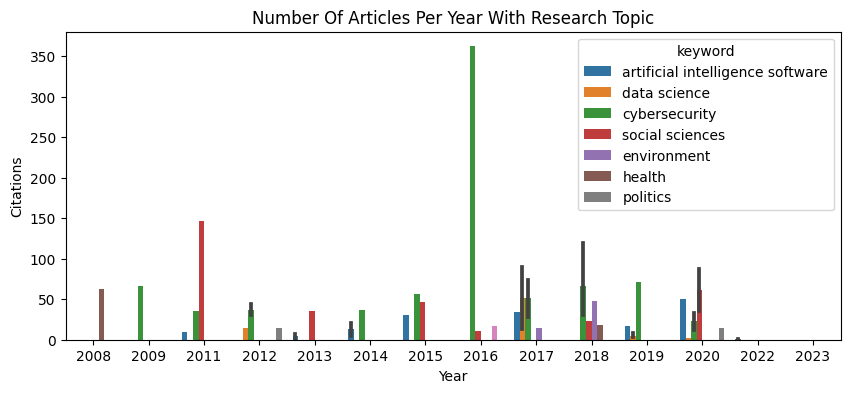

In [109]:
# 
# 
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=ddd, x="year", y="cited",order=sorted(ddd['year'].unique()), hue='keyword')
plt.title("Number Of Articles Per Year With Research Topic")
plt.xlabel("Year")
plt.ylabel("Citations")
plt.show()